# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.015,
    population_initializer=VentInitializer(
        population_size=1000,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 1000
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.015
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fi

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

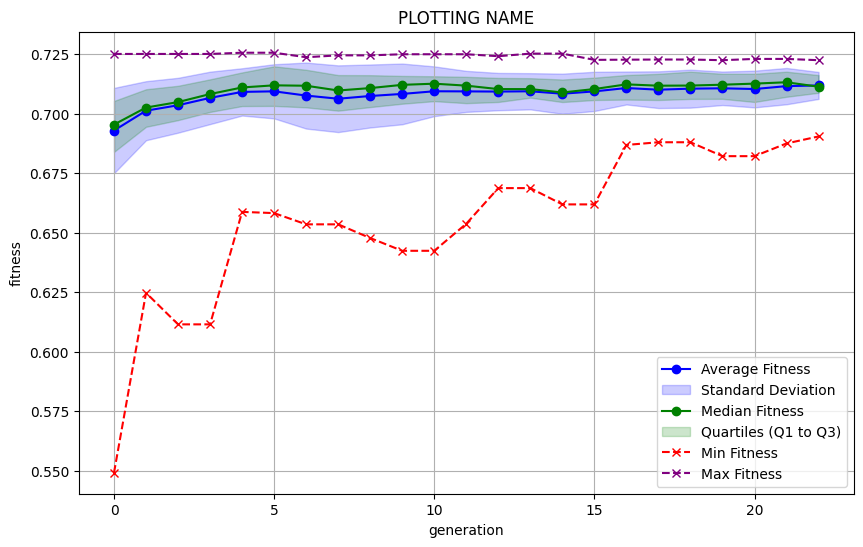

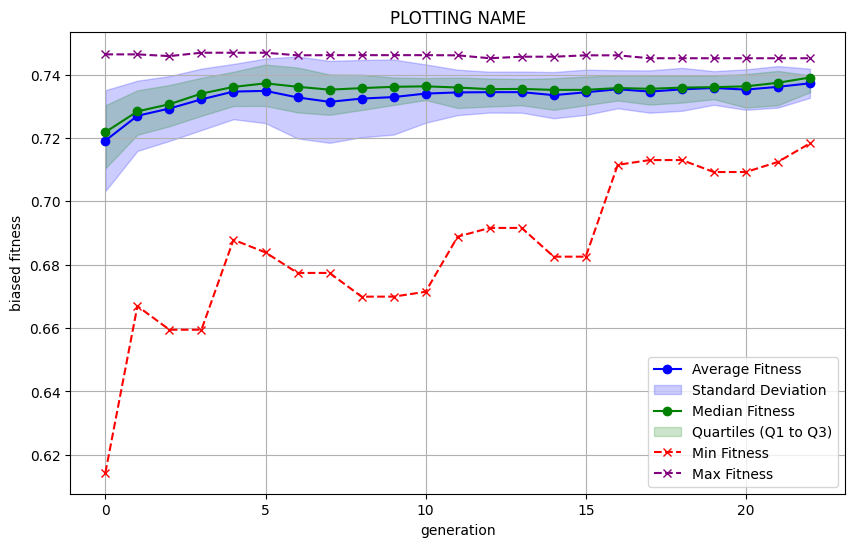

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_249: ['DoubleParabolicShape_623', 'CornerTransformation_487']
predict: (0.28816136064931785, 373.0610295999998, 457.374449)
biased_fitness: 0.7422102883068227, fitness: 0.7162090005068222
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.35623917206327, rot_count: 5.0, ]


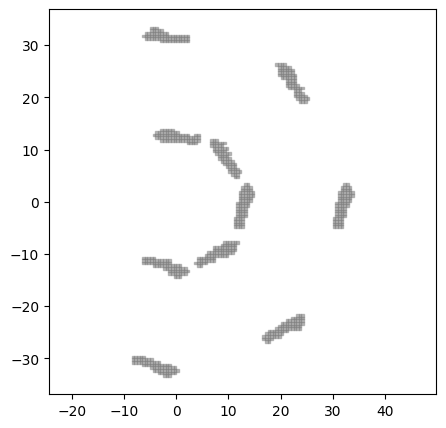

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_620', 'CornerTransformation_590']
predict: (0.28867630330356775, 373.2662995999999, 457.9844043000001)
biased_fitness: 0.7344040611643228, fitness: 0.7069834474643223
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.6651078152328422, upper_y-intercept_from_lower_y: 1.907566081967033, lower_x_trans: -0.5840336576416478, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


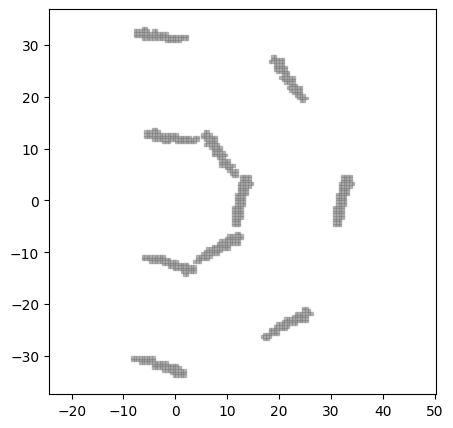

--------------------------------------------------
label: VentHole Chromosome_759: ['DoubleParabolicShape_687', 'CornerTransformation_463']
predict: (0.28900012157997024, 373.2042045, 457.03824870000005)
biased_fitness: 0.7334928553002974, fitness: 0.7087865182002973
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 10.781843367749277, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 2.0, ]


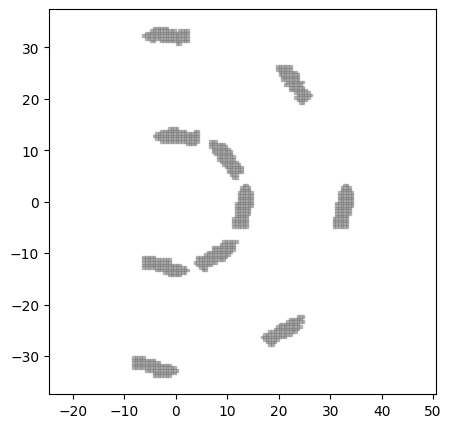

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_463', 'CornerTransformation_598']
predict: (0.2883560679054582, 373.02457829999986, 456.74336409999995)
biased_fitness: 0.7417805446454189, fitness: 0.7175996089454187
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 14.911702709506624, dx: 2.0618370661734913, phi: 0.46428048716299763, rot_count: 4.0, ]


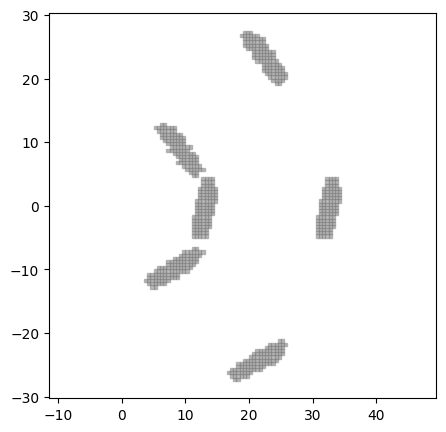

--------------------------------------------------
label: VentHole Chromosome_501: ['DoubleParabolicShape_598', 'CornerTransformation_598']
predict: (0.28897418878325354, 373.1073919999999, 456.00278669999994)
biased_fitness: 0.7365007947674653, fitness: 0.7147072186674653
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 14.911702709506624, dx: 2.0618370661734913, phi: 0.46428048716299763, rot_count: 4.0, ]


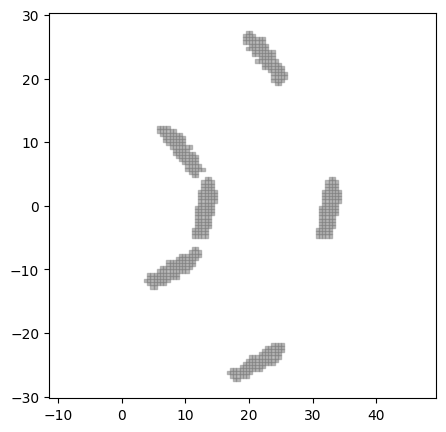

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_501', 'CornerTransformation_759']
predict: (0.2885190879662658, 372.87111300000004, 457.8240215999999)
biased_fitness: 0.7390632861373417, fitness: 0.711333447337342
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 10.781843367749277, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 2.0, ]


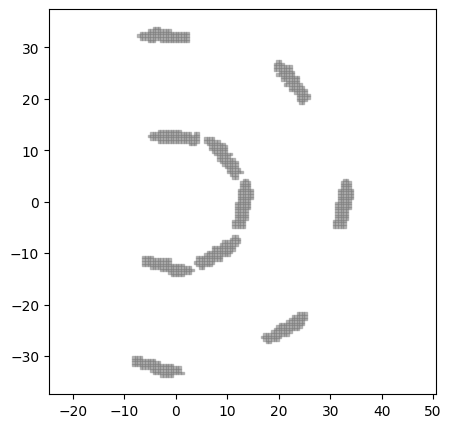

--------------------------------------------------
label: VentHole Chromosome_590: ['DoubleParabolicShape_598', 'CornerTransformation_752']
predict: (0.28898649945573784, 373.0547186, 455.6240298)
biased_fitness: 0.7375039156426215, fitness: 0.7167412634426215
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


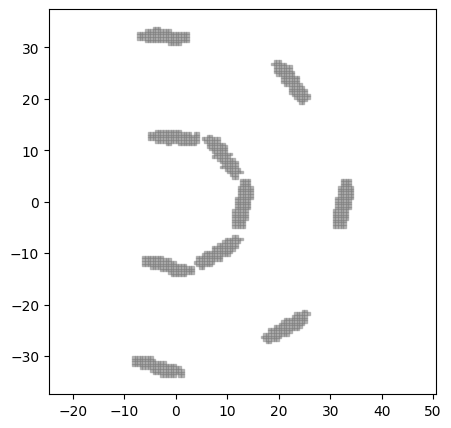

--------------------------------------------------
label: VentHole Chromosome_759: ['DoubleParabolicShape_440', 'CornerTransformation_590']
predict: (0.28963765168857414, 373.06332399999997, 458.23069169999985)
biased_fitness: 0.7257188317142589, fitness: 0.6971534046142593
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


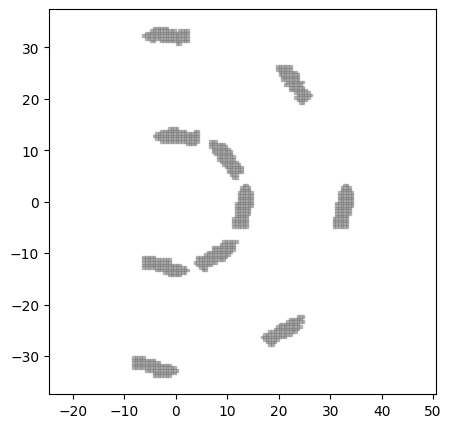

--------------------------------------------------
label: VentHole Chromosome_620: ['DoubleParabolicShape_598', 'CornerTransformation_249']
predict: (0.2888562235911851, 373.3493898, 456.41103350000003)
biased_fitness: 0.7351699684881486, fitness: 0.7126356475881486
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


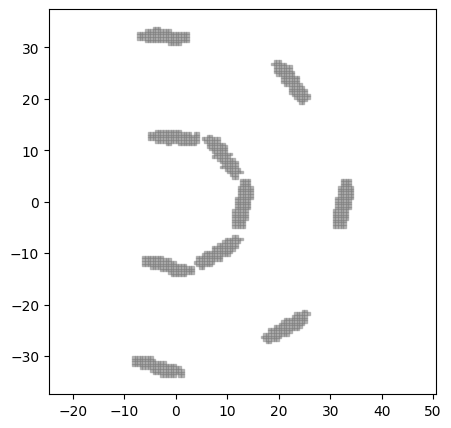

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_752', 'CornerTransformation_114']
predict: (0.2885694856220644, 373.03540209999994, 456.8902539)
biased_fitness: 0.7392768212793561, fitness: 0.714676863779356
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


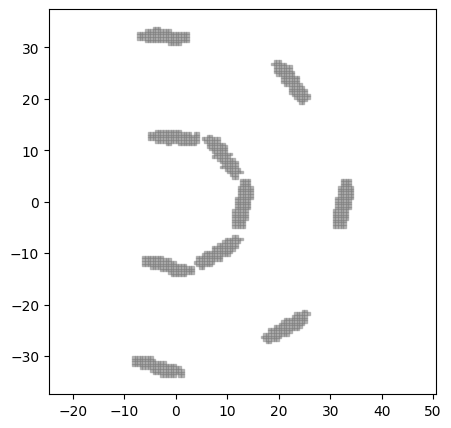

--------------------------------------------------
label: VentHole Chromosome_947: ['DoubleParabolicShape_759', 'CornerTransformation_598']
predict: (0.28840427110072264, 373.32113209999983, 457.21934949999996)
biased_fitness: 0.7382706652927749, fitness: 0.7132548809927746
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.6651078152328422, upper_y-intercept_from_lower_y: 1.907566081967033, lower_x_trans: -0.5840336576416478, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


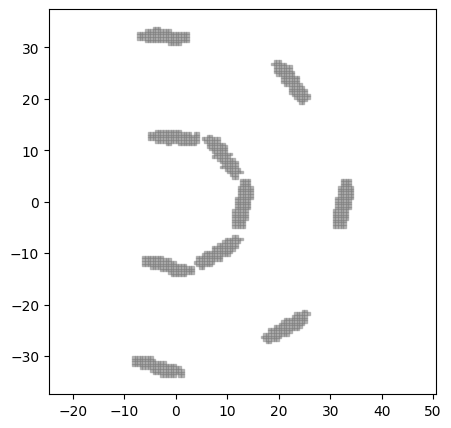

--------------------------------------------------
label: VentHole Chromosome_590: ['DoubleParabolicShape_367', 'CornerTransformation_558']
predict: (0.2887997841345835, 373.27866670000003, 457.43560569999994)
biased_fitness: 0.7341802803541646, fitness: 0.7084307966541649
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 9.255524774711436, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 2.0, ]


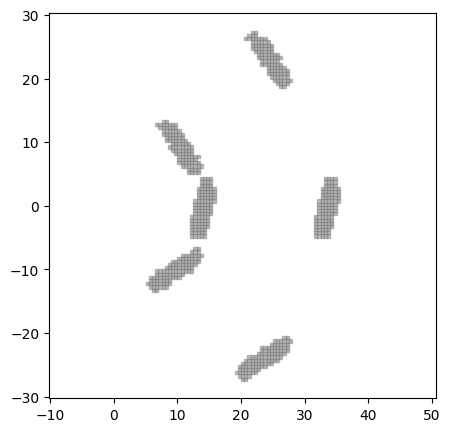

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_221', 'CornerTransformation_598']
predict: (0.28860112183920394, 372.90537409999996, 456.20691730000004)
biased_fitness: 0.7412373283079607, fitness: 0.7184273246079604
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


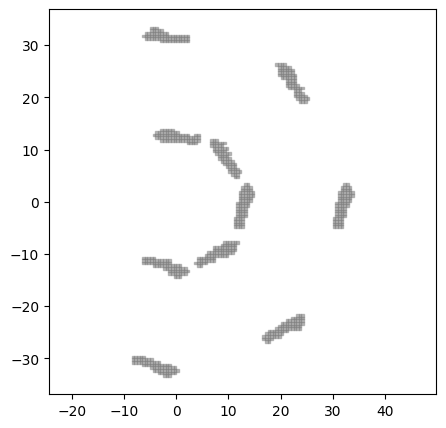

--------------------------------------------------
label: VentHole Chromosome_687: ['DoubleParabolicShape_623', 'CornerTransformation_249']
predict: (0.2899286148857092, 373.14225209999995, 455.3483989999999)
biased_fitness: 0.7280212884429083, fitness: 0.7082605956429084
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.3784890079822832, rot_count: 5.0, ]


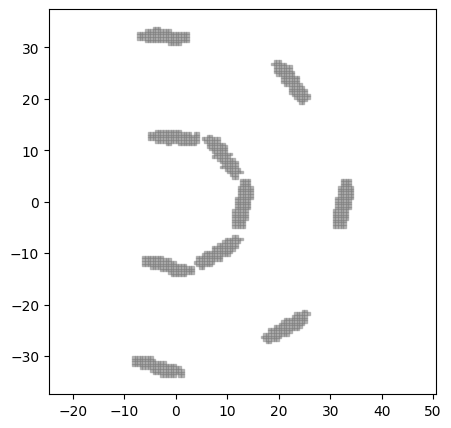

--------------------------------------------------
label: VentHole Chromosome_501: ['DoubleParabolicShape_947', 'CornerTransformation_687']
predict: (0.2900532752433391, 373.5143169000001, 458.2912647000001)
biased_fitness: 0.7182844998666076, fitness: 0.6904393395666075
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.3784890079822832, rot_count: 5.0, ]


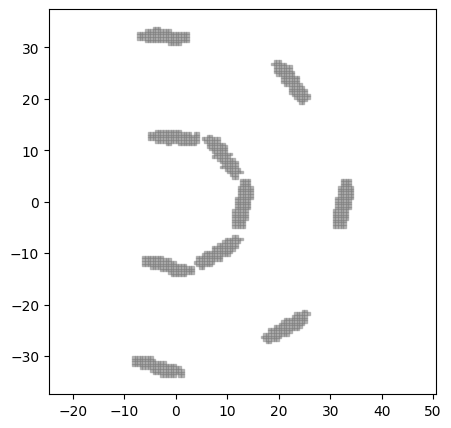

--------------------------------------------------
label: VentHole Chromosome_249: ['DoubleParabolicShape_249', 'CornerTransformation_35']
predict: (0.28932923331218197, 372.8266462000001, 457.07404310000004)
biased_fitness: 0.7327730572781795, fitness: 0.7072042203781796
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 10.781843367749277, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 2.0, ]


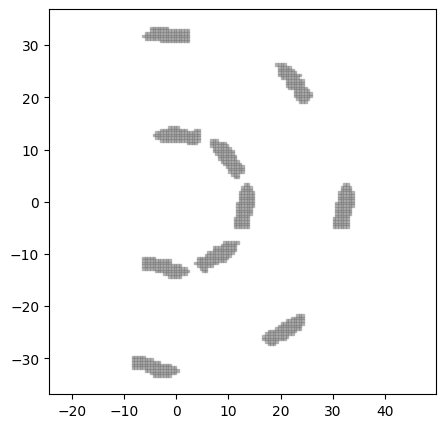

--------------------------------------------------
label: VentHole Chromosome_37: ['DoubleParabolicShape_114', 'CornerTransformation_623']
predict: (0.2889048651744237, 372.81324559999985, 457.6203939000001)
biased_fitness: 0.7360178412557635, fitness: 0.7087831507557629
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.34903041189333206, rot_count: 2.0, ]


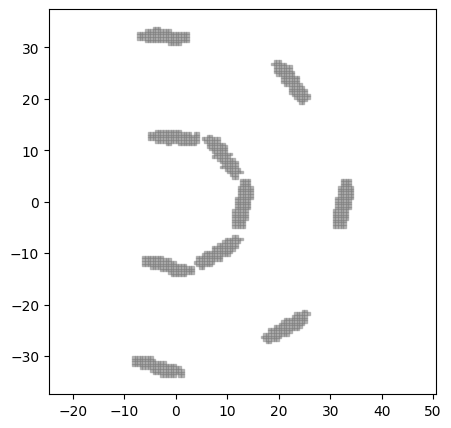

--------------------------------------------------
label: VentHole Chromosome_759: ['DoubleParabolicShape_598', 'CornerTransformation_687']
predict: (0.289047743401015, 373.12816330000004, 458.64791949999994)
biased_fitness: 0.7303295838898494, fitness: 0.7006421519898497
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 10.781843367749277, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 2.0, ]


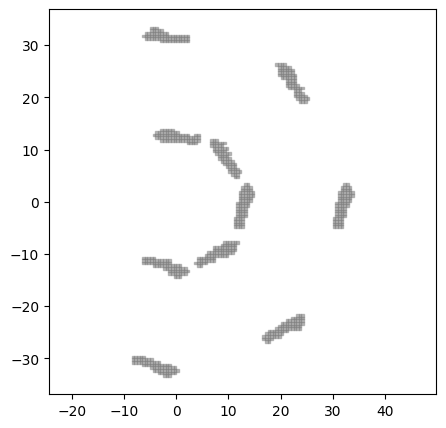

--------------------------------------------------
label: VentHole Chromosome_687: ['DoubleParabolicShape_759', 'CornerTransformation_114']
predict: (0.28895738931630355, 373.0938218999998, 458.3748797)
biased_fitness: 0.7320195941369657, fitness: 0.7030825988369653
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


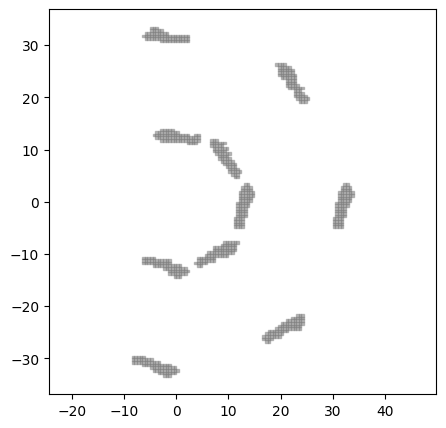

--------------------------------------------------
label: VentHole Chromosome_249: ['DoubleParabolicShape_687', 'CornerTransformation_114']
predict: (0.28858222916217446, 373.0980214999999, 457.58531170000003)
biased_fitness: 0.7373209344782559, fitness: 0.7107610423782555
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.6651078152328422, upper_y-intercept_from_lower_y: 1.907566081967033, lower_x_trans: -0.5840336576416478, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.3784890079822832, rot_count: 5.0, ]


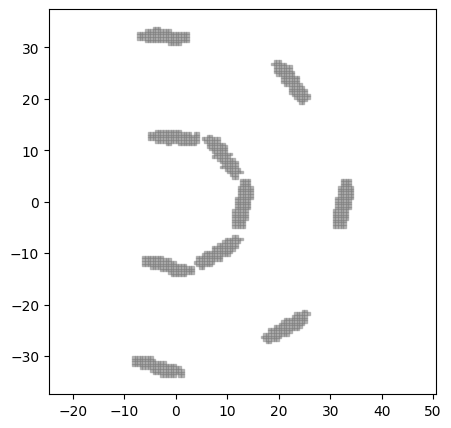

--------------------------------------------------
label: VentHole Chromosome_598: ['DoubleParabolicShape_221', 'CornerTransformation_759']
predict: (0.28880995443537993, 373.1672789999999, 456.1848579)
biased_fitness: 0.7373597868462013, fitness: 0.7151397711462011
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 2.824755451092564, lower_y-intercept: 2.458051629962823, upper_y-intercept_from_lower_y: 1.7342148567649383, lower_x_trans: -2.5387203832552165, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


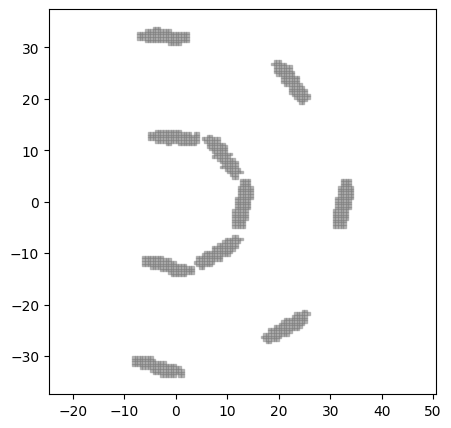

--------------------------------------------------
label: VentHole Chromosome_35: ['DoubleParabolicShape_487', 'CornerTransformation_37']
predict: (0.28820939362913345, 373.0067751999999, 456.33716010000006)
biased_fitness: 0.7441843171086661, fitness: 0.7211863872086657
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.6651078152328422, upper_y-intercept_from_lower_y: 1.907566081967033, lower_x_trans: -0.5840336576416478, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.34903041189333206, rot_count: 2.0, ]


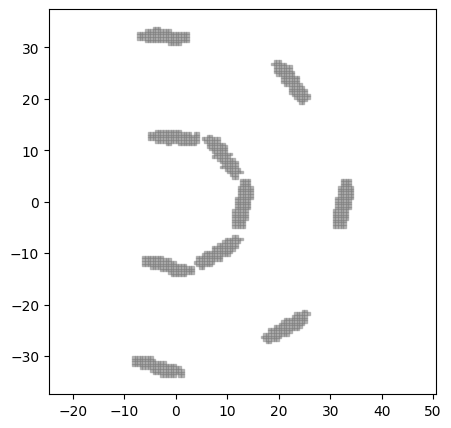

--------------------------------------------------
label: VentHole Chromosome_367: ['DoubleParabolicShape_249', 'CornerTransformation_35']
predict: (0.29002770684138124, 372.86322659999996, 456.8042898)
biased_fitness: 0.7260717657861878, fitness: 0.7013853495861878
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.6651078152328422, upper_y-intercept_from_lower_y: 1.907566081967033, lower_x_trans: -0.5840336576416478, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


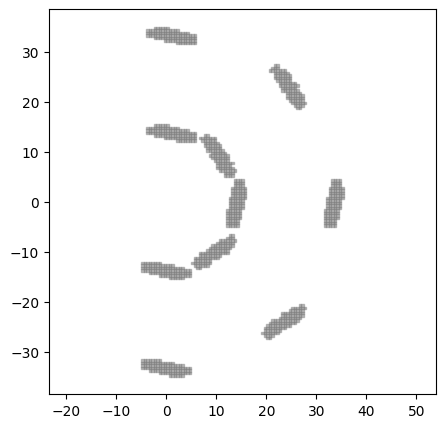

--------------------------------------------------
label: VentHole Chromosome_463: ['DoubleParabolicShape_249', 'CornerTransformation_957']
predict: (0.288558661091745, 373.01439489999984, 456.5891840000001)
biased_fitness: 0.7401342567825508, fitness: 0.7163954945825503
shape parameter:
parameter_list: [ lower_coefficient: 1.001400582638369, upper_coefficient: 1.6005925746479683, lower_y-intercept: 1.1809065104440433, upper_y-intercept_from_lower_y: 1.9746072168156035, lower_x_trans: -1.6361117158845815, ]
pattern parameter:
parameter_list: [ di: 8.103197599140262, dx: 9.671049416458606, phi: 0.6317632567612819, rot_count: 5.0, ]


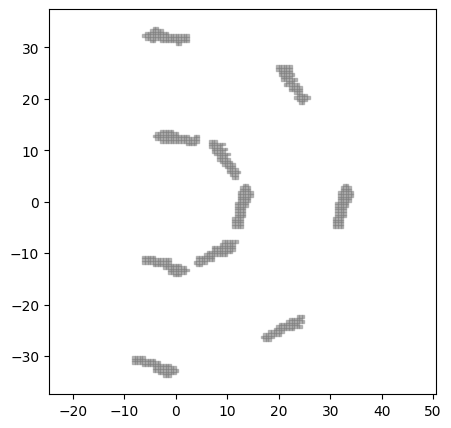

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )